In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config.paths_config import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [2]:
df = pd.read_csv(RAW_DATA)

In [5]:
# Exibe todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,Physical_Activity,Diabetes,Inflammatory_Bowel_Disease,Genetic_Mutation,Screening_History,Early_Detection,Treatment_Type,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,Low,Low,No,No,No,Regular,Yes,Combination,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,Moderate,Low,No,No,No,Regular,No,Chemotherapy,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,Low,Low,No,Yes,No,Irregular,No,Chemotherapy,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,High,Low,No,No,No,Regular,No,Surgery,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,Low,Moderate,No,Yes,No,Never,Yes,Surgery,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [21]:
df.isnull().sum()

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.shape

(167497, 28)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [26]:
df.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


### Visualizations

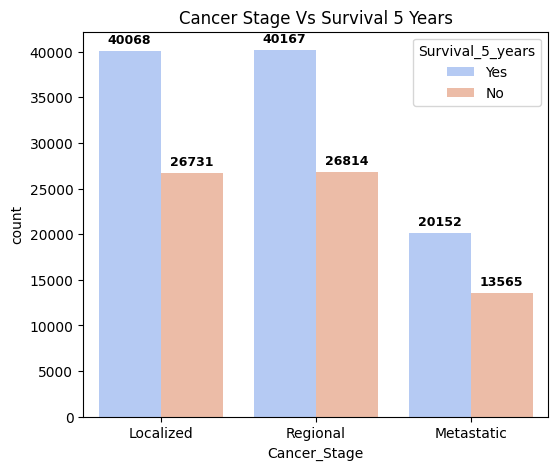

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x="Cancer_Stage", hue="Survival_5_years", data=df, palette="coolwarm")

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9, weight='bold')
    
plt.title("Cancer Stage Vs Survival 5 Years")
plt.show()

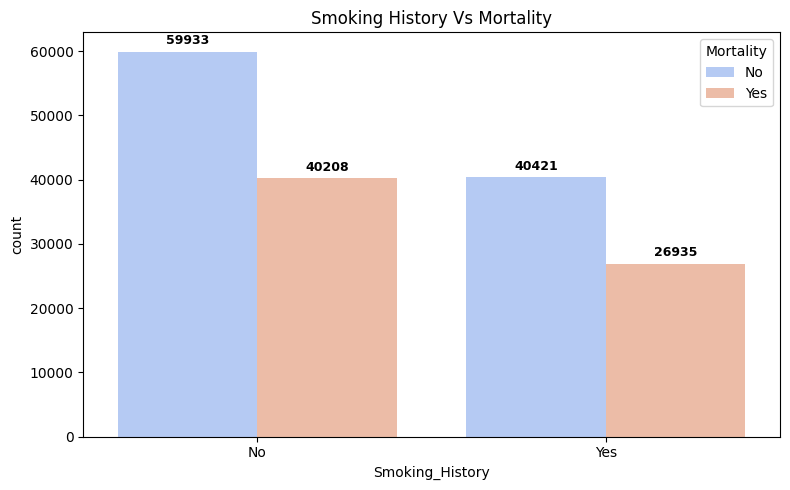

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Smoking_History", hue="Mortality", data=df, palette="coolwarm")
plt.title("Smoking History Vs Mortality")

# Adiciona o valor no topo de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9, weight='bold')

plt.tight_layout()
plt.show()


C:\Users\eduar\AppData\Local\Temp\ipykernel_22412\4008530115.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancer_Stage", y="Tumor_Size_mm", data=df, palette="coolwarm")


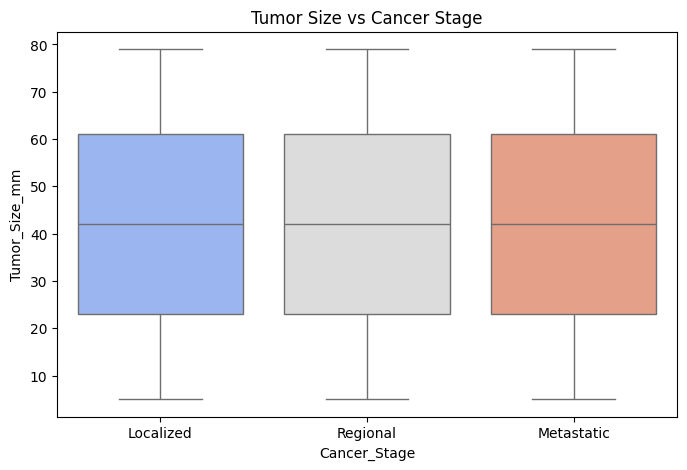

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Cancer_Stage", y="Tumor_Size_mm", data=df, palette="coolwarm")
plt.title("Tumor Size vs Cancer Stage")
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_22412\425257505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survival_Prediction", y="Healthcare_Costs", data=df, palette="coolwarm")


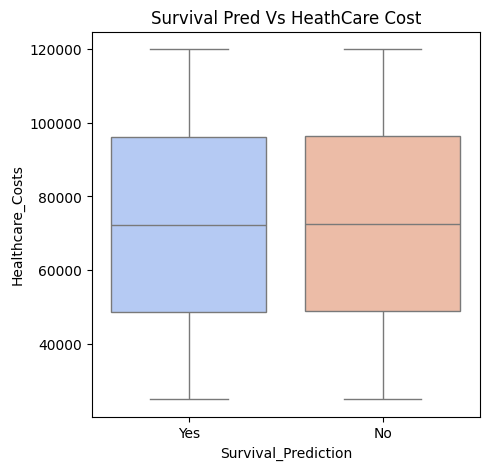

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(x="Survival_Prediction", y="Healthcare_Costs", data=df, palette="coolwarm")
plt.title("Survival Pred Vs HeathCare Cost")
plt.show()

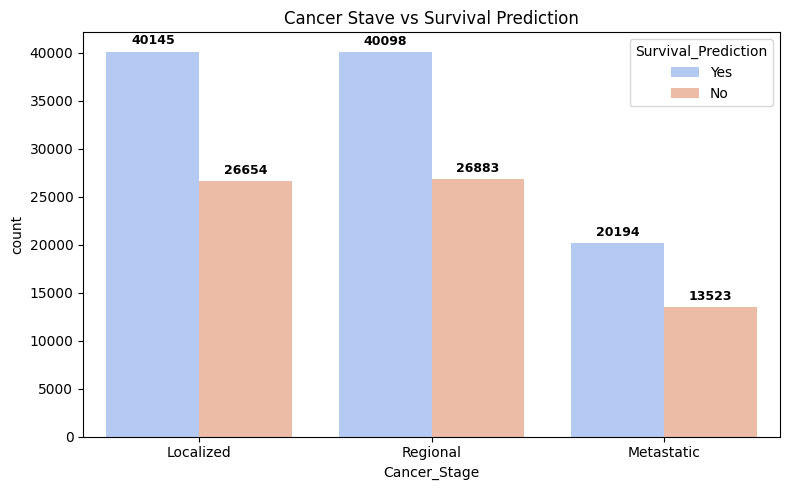

In [42]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Cancer_Stage", hue="Survival_Prediction", data=df, palette="coolwarm")
plt.title("Cancer Stave vs Survival Prediction")

# Adiciona o valor no topo de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

### Data Processing

In [43]:
df = df.drop(columns=['Patient_ID'])

In [45]:
df.shape

(167497, 27)

In [46]:
X = df.drop(columns=['Survival_Prediction'])
Y = df["Survival_Prediction"]

In [50]:
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

### CHI-SQUARE-TEST

In [55]:
X_cat = X_train.select_dtypes(include=['int64', 'float64'])

chi2_selector = SelectKBest(score_func=chi2, k="all")

chi2_selector.fit(X_cat,y_train)



,score_func,<function chi...001F8EEECFD80>
,k,'all'


In [56]:
chi2_scores = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2_Score' : chi2_selector.scores_}
).sort_values(by="Chi2_Score", ascending=False)

In [57]:
chi2_scores

,Feature,Chi2_Score
19,Healthcare_Costs,2097.430133
4,Tumor_Size_mm,7.971461
16,Treatment_Type,4.987144
11,Diabetes,2.103967
21,Mortality_Rate_per_100K,1.963077
25,Insurance_Status,1.464241
3,Cancer_Stage,1.281849
14,Screening_History,1.159519
0,Country,0.883425
24,Healthcare_Access,0.713346


In [ ]:
top_features = chi2_scores.head(5)["Feature"].tolist()

In [60]:
X = X[top_features]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

### Model Building

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [66]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [67]:
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [68]:
y_pred = gb.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)

In [71]:
accuracy

0.5995223880597015

In [74]:
report = classification_report(y_test, y_pred)

In [76]:
print(report)

              precision    recall  f1-score   support

          No       0.44      0.00      0.00     13412
         Yes       0.60      1.00      0.75     20088

    accuracy                           0.60     33500
   macro avg       0.52      0.50      0.38     33500
weighted avg       0.54      0.60      0.45     33500



In [77]:
y_proba = gb.predict_proba(X_test)[ : , 1] if len(Y.unique()) == 2 else None

In [79]:
roc_auc_score(y_test, y_proba)

0.49967731082550826

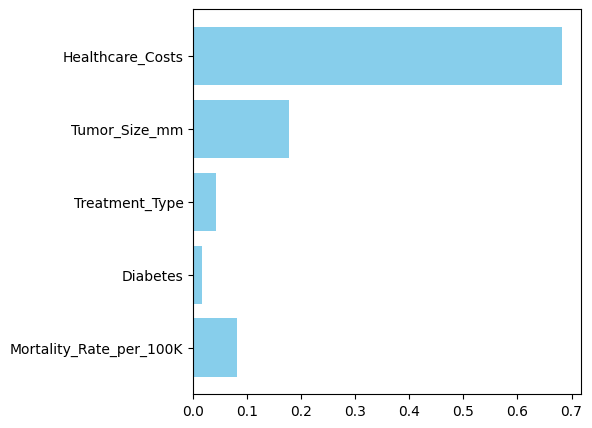

In [80]:
plt.figure(figsize=(5,5))
plt.barh(top_features, gb.feature_importances_, color='skyblue')
plt.gca().invert_yaxis()
plt.show()

### Testing

In [88]:
X.columns

Index(['Healthcare_Costs', 'Tumor_Size_mm', 'Treatment_Type', 'Diabetes',
       'Mortality_Rate_per_100K'],
      dtype='object')

In [105]:
test_array = np.array([55,0,0,0,0]).reshape(1, -1)

In [106]:
gb.predict(test_array)

array(['No'], dtype=object)

###